In [24]:
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.models import Sequential, Model, load_model
from keras.utils import plot_model
from keras.layers import *
from keras.callbacks import *
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, adam
from sklearn.metrics import classification_report, confusion_matrix
from keras.applications.densenet import DenseNet121

np.random.seed(3)

In [25]:
# By Augmentation, Accuracy 91.95% -> 93.77%
train_datagen = ImageDataGenerator(rescale=1./255,
    height_shift_range=0.05,\
    width_shift_range=0.05, \
    shear_range = 5, \
    zoom_range = 0.05, \
    rotation_range = 3, \
    horizontal_flip = True, \
    vertical_flip = True, \
    channel_shift_range = 15, \
    samplewise_center = True)
test_datagen = ImageDataGenerator(rescale=1./255, \
    samplewise_center = True)
val_datagen = ImageDataGenerator(rescale=1./255, \
    samplewise_center = True)

batch_size = 32 # 16->64->32
epochs = 100 # 50->100
root_path = '/home/mywork/kijun_kwon/data_split1'
train_path = root_path +'/train'
val_path = root_path +'/val'
test_path = root_path +'/test'
path_list = [train_path, val_path, test_path]

class_root='/home/mywork/kijun_kwon/data_split1/train'
class_list = [ item for item in os.listdir(class_root) if os.path.isdir(os.path.join(class_root, item)) ]
class_list.sort()

sizesOfSet = [0, 0, 0] # size of training set, validation set, test set
for p in range(len(path_list)) :
    for i in range(len(class_list)):
        sizesOfSet[p] += (len([name for name in os.listdir(path_list[p] + '/'+ class_list[i]) if os.path.isfile(os.path.join(path_list[p]+ '/'+ class_list[i], name))]))

image_height = 224
image_width = 224
channels = 3

In [26]:
model = DenseNet121(include_top=True, weights = None, input_tensor=None, input_shape=(image_height,image_width,channels), pooling=None, classes=len(class_list))

In [27]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        color_mode = "rgb",
        target_size=(image_height, image_width),
        batch_size = batch_size,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_path,
        shuffle = False,
        color_mode = "rgb",
        target_size=(image_height, image_width),    
        batch_size=batch_size,
        class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
        val_path,
        color_mode = "rgb",
        target_size=(image_height, image_width),
        batch_size=batch_size,
        class_mode='categorical')

Found 1965 images belonging to 7 classes.
Found 658 images belonging to 7 classes.
Found 655 images belonging to 7 classes.


In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
model_checkpoint = ModelCheckpoint(('./densenet.{epoch:02d}.hdf5'),
                                   monitor='val_loss',
                                   verbose=1,
                                   save_best_only=True,
                                   save_weights_only=True)

reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss', factor=0.3,
                                         patience=5, verbose=1)

callbacks = [model_checkpoint, reduce_learning_rate]

In [30]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch = sizesOfSet[0] // batch_size,
            epochs=epochs,
            validation_data=val_generator,
            validation_steps= sizesOfSet[1] // batch_size,
            callbacks=callbacks)

Epoch 1/100
61/61 [==============================] - 56s 920ms/step - loss: 1.2780 - acc: 0.5432 - val_loss: 11.5378 - val_acc: 0.2125

Epoch 00001: val_loss improved from inf to 11.53778, saving model to ./densenet.01.hdf5
Epoch 2/100
61/61 [==============================] - 29s 469ms/step - loss: 0.9644 - acc: 0.6524 - val_loss: 10.0336 - val_acc: 0.1573

Epoch 00002: val_loss improved from 11.53778 to 10.03361, saving model to ./densenet.02.hdf5
Epoch 3/100
61/61 [==============================] - 29s 474ms/step - loss: 0.8233 - acc: 0.6966 - val_loss: 8.5092 - val_acc: 0.2440

Epoch 00003: val_loss improved from 10.03361 to 8.50925, saving model to ./densenet.03.hdf5
Epoch 4/100
61/61 [==============================] - 28s 462ms/step - loss: 0.7827 - acc: 0.7199 - val_loss: 9.1979 - val_acc: 0.1124

Epoch 00004: val_loss did not improve from 8.50925
Epoch 5/100
61/61 [==============================] - 28s 453ms/step - loss: 0.6899 - acc: 0.7549 - val_loss: 7.2639 - val_acc: 0.2215


61/61 [==============================] - 27s 443ms/step - loss: 0.1358 - acc: 0.9537 - val_loss: 0.2471 - val_acc: 0.9326

Epoch 00040: val_loss did not improve from 0.22143
Epoch 41/100
61/61 [==============================] - 27s 447ms/step - loss: 0.1386 - acc: 0.9572 - val_loss: 0.2538 - val_acc: 0.9133

Epoch 00041: val_loss did not improve from 0.22143
Epoch 42/100
61/61 [==============================] - 27s 435ms/step - loss: 0.1472 - acc: 0.9513 - val_loss: 0.2154 - val_acc: 0.9342

Epoch 00042: val_loss improved from 0.22143 to 0.21538, saving model to ./densenet.42.hdf5
Epoch 43/100
61/61 [==============================] - 27s 438ms/step - loss: 0.1487 - acc: 0.9498 - val_loss: 0.2782 - val_acc: 0.9141

Epoch 00043: val_loss did not improve from 0.21538
Epoch 44/100
61/61 [==============================] - 34s 562ms/step - loss: 0.1321 - acc: 0.9539 - val_loss: 0.2640 - val_acc: 0.9149

Epoch 00044: val_loss did not improve from 0.21538
Epoch 45/100
61/61 [==================

61/61 [==============================] - 25s 410ms/step - loss: 0.1193 - acc: 0.9609 - val_loss: 0.2341 - val_acc: 0.9310

Epoch 00081: val_loss did not improve from 0.16830
Epoch 82/100
61/61 [==============================] - 25s 408ms/step - loss: 0.1169 - acc: 0.9637 - val_loss: 0.2369 - val_acc: 0.9310

Epoch 00082: val_loss did not improve from 0.16830
Epoch 83/100
61/61 [==============================] - 25s 406ms/step - loss: 0.1170 - acc: 0.9644 - val_loss: 0.2316 - val_acc: 0.9310

Epoch 00083: val_loss did not improve from 0.16830
Epoch 84/100
61/61 [==============================] - 26s 419ms/step - loss: 0.1121 - acc: 0.9595 - val_loss: 0.2125 - val_acc: 0.9342

Epoch 00084: val_loss did not improve from 0.16830

Epoch 00084: ReduceLROnPlateau reducing learning rate to 6.561000276406048e-08.
Epoch 85/100
61/61 [==============================] - 25s 413ms/step - loss: 0.1305 - acc: 0.9540 - val_loss: 0.2243 - val_acc: 0.9328

Epoch 00085: val_loss did not improve from 0.168

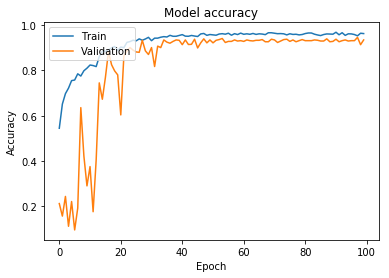

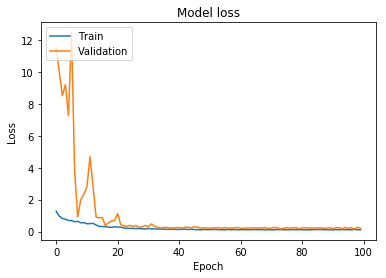

In [31]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [32]:
Y_pred = model.predict_generator(test_generator, sizesOfSet[2] // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('\tConfusion Matrix')
conf = confusion_matrix(test_generator.classes, y_pred)
print(conf)
print('\n\t\t\tClassification Report')
report = classification_report(test_generator.classes, y_pred, target_names=class_list)
report_dict = classification_report(test_generator.classes, y_pred, target_names=class_list, output_dict = True)
print(report)
print("\n-- Evaluate --")
scores = model.evaluate_generator(test_generator)
under = 1-report_dict['ok']['precision']
over = 1-report_dict['ok']['recall']
print("%s: %.2f\t%s: %.2f%%\n과검율: %.2f%%\t 미검율: %.2f%%"
      %(model.metrics_names[0], scores[0], model.metrics_names[1], scores[1]*100,
        over*100, under*100))

	Confusion Matrix
[[124   1   0   0   0   2   1]
 [  0  65   2   0   0   0   7]
 [  2   1 221   0   0   1   0]
 [  0   0   0  69   0   0   0]
 [  0   1   0   0  16   0   1]
 [  1   0   1   0   0  87   0]
 [  0  12   3   0   5   0  35]]

			Classification Report
               precision    recall  f1-score   support

         dent       0.98      0.97      0.97       128
discoloration       0.81      0.88      0.84        74
           ok       0.97      0.98      0.98       225
        other       1.00      1.00      1.00        69
      scratch       0.76      0.89      0.82        18
         sink       0.97      0.98      0.97        89
    substance       0.80      0.64      0.71        55

    micro avg       0.94      0.94      0.94       658
    macro avg       0.90      0.90      0.90       658
 weighted avg       0.94      0.94      0.94       658


-- Evaluate --
loss: 0.19	acc: 93.77%
과검율: 1.78%	 미검율: 2.64%
